In [1]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np

In [2]:
with open('train.csv', 'r') as f:
    train = pd.read_csv(f)
    
with open('test.csv', 'r') as f:
    test = pd.read_csv(f)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train['Sum'] = train.sum(axis=1)
train.Sum = pd.qcut(train.Sum, 5, labels=range(5))
train.Sum = train.Sum.astype('int')


train['Mean'] = train.mean(axis=1)
train.Mean = pd.qcut(train.Mean, 10, labels=range(10))
train.Mean = train.Mean.astype('int')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Sum,Mean
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9


In [6]:
test['Sum'] = test.sum(axis=1)
test.Sum = pd.qcut(test.Sum, 5, labels=range(5))
test.Sum = test.Sum.astype('int')


test['Mean'] = test.mean(axis=1)
test.Mean = pd.qcut(test.Mean, 10, labels=range(10))
test.Mean = test.Mean.astype('int')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Sum,Mean
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4


In [7]:
train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [8]:
X = train.iloc[:,1:].copy()
y = train.label.copy()
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Sum,Mean
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,6
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,7
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

# XGBClassifier

In [10]:
xgb = XGBClassifier(objective='mutli:softmax', verbose=3, n_estimators=150)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='merror', early_stopping_rounds=5)

[0]	validation_0-merror:0.305905
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.248095
[2]	validation_0-merror:0.225429
[3]	validation_0-merror:0.215048
[4]	validation_0-merror:0.20581
[5]	validation_0-merror:0.198762
[6]	validation_0-merror:0.194667
[7]	validation_0-merror:0.189714
[8]	validation_0-merror:0.181143
[9]	validation_0-merror:0.175524
[10]	validation_0-merror:0.172571
[11]	validation_0-merror:0.168381
[12]	validation_0-merror:0.161238
[13]	validation_0-merror:0.158381
[14]	validation_0-merror:0.155143
[15]	validation_0-merror:0.15181
[16]	validation_0-merror:0.148571
[17]	validation_0-merror:0.145333
[18]	validation_0-merror:0.143429
[19]	validation_0-merror:0.141143
[20]	validation_0-merror:0.139048
[21]	validation_0-merror:0.137333
[22]	validation_0-merror:0.135714
[23]	validation_0-merror:0.133238
[24]	validation_0-merror:0.131524
[25]	validation_0-merror:0.130381
[26]	validation_0-merror:0.128476
[27]	validation_0-merror:0.1

XGBClassifier(n_estimators=150, objective='multi:softprob', verbose=3)

In [11]:
xgb.score(X_test, y_test)

0.9416190476190476

In [12]:
xgb_pred = xgb.predict(X_test)
xgb_pred[:10]

array([0, 0, 7, 1, 0, 5, 2, 3, 7, 4], dtype=int64)

In [13]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1033
           1       0.96      0.99      0.97      1171
           2       0.95      0.93      0.94      1044
           3       0.94      0.90      0.92      1088
           4       0.93      0.94      0.94      1018
           5       0.93      0.95      0.94       949
           6       0.97      0.97      0.97      1034
           7       0.95      0.93      0.94      1100
           8       0.92      0.93      0.93      1016
           9       0.89      0.91      0.90      1047

    accuracy                           0.94     10500
   macro avg       0.94      0.94      0.94     10500
weighted avg       0.94      0.94      0.94     10500



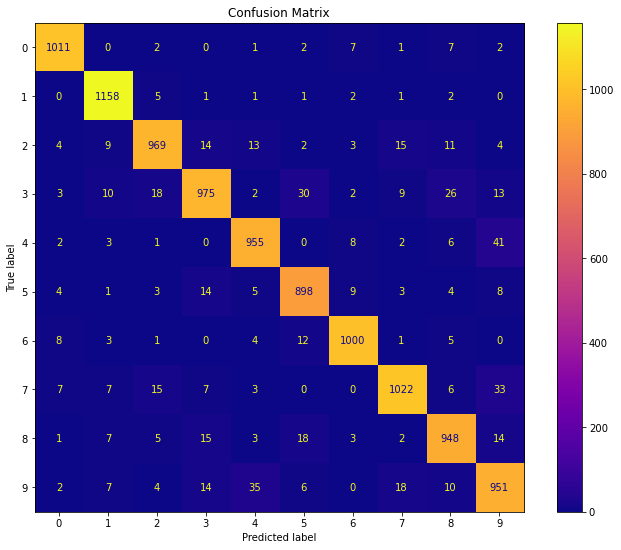

In [16]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
plot_confusion_matrix(xgb, X_test, y_test, cmap='plasma', ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [17]:
one_xgb = OneVsRestClassifier(XGBClassifier(n_estimators=150, objective='binary:logistic', verbose=3), n_jobs=-1)
one_xgb.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(n_estimators=150, verbose=3),
                    n_jobs=-1)

In [18]:
one_xgb.score(X_test, y_test)

0.9466666666666667

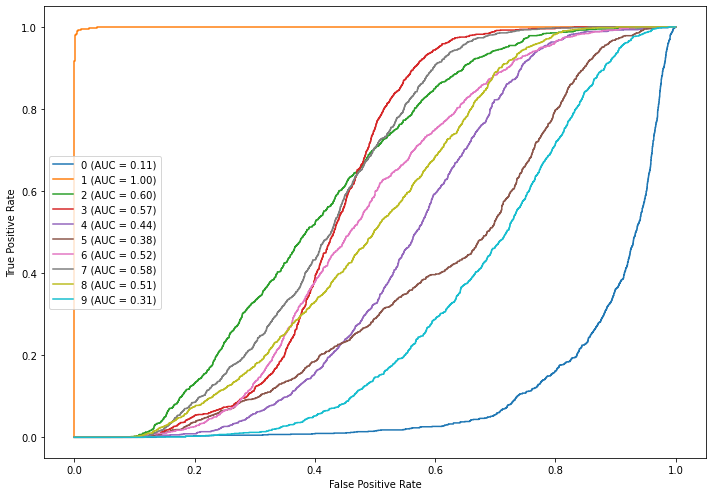

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
for x in range(len(one_xgb.estimators_)):
    plot_roc_curve(one_xgb.estimators_[x], X_test, y_test, name=x, ax=ax)
plt.legend(loc='best')
plt.tight_layout()

# RandomForestClassifier 

In [20]:
one_rf = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=600, verbose=1, n_jobs=-1), n_jobs=-1)
one_rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=ExtraTreesClassifier(n_estimators=600, n_jobs=-1,
                                                   verbose=1),
                    n_jobs=-1)

In [21]:
one_rf.score(X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed: 

0.9692380952380952

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed: 

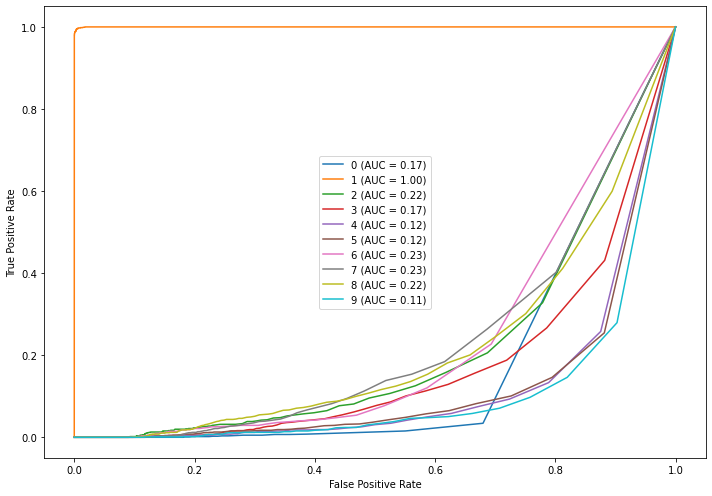

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
for x in range(len(one_rf.estimators_)):
    plot_roc_curve(one_rf.estimators_[x], X_test, y_test, name=x, ax=ax)
plt.legend(loc='best')
plt.tight_layout()

# LogisticRegression 

In [23]:
one_logreg = OneVsRestClassifier(LogisticRegression(n_jobs=-1, verbose=2, warm_start=True, max_iter=300), n_jobs=-1)
one_logreg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=300, n_jobs=-1,
                                                 verbose=2, warm_start=True),
                    n_jobs=-1)

In [24]:
one_logreg.score(X_test, y_test)

0.9051428571428571

In [25]:
print(classification_report(y_test, one_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1033
           1       0.94      0.97      0.95      1171
           2       0.90      0.87      0.88      1044
           3       0.90      0.87      0.89      1088
           4       0.92      0.91      0.91      1018
           5       0.87      0.86      0.86       949
           6       0.95      0.95      0.95      1034
           7       0.92      0.90      0.91      1100
           8       0.83      0.87      0.85      1016
           9       0.86      0.87      0.87      1047

    accuracy                           0.91     10500
   macro avg       0.90      0.90      0.90     10500
weighted avg       0.91      0.91      0.91     10500



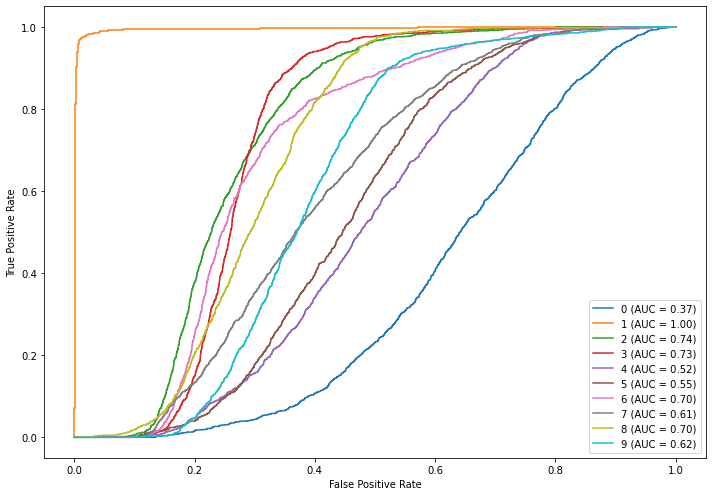

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
for x in range(len(one_logreg.estimators_)):
    plot_roc_curve(one_logreg.estimators_[x], X_test, y_test, name=x, ax=ax)
plt.legend(loc='best')
plt.tight_layout()

# Result 

In [28]:
clf1 = XGBClassifier(objective='multi:softmax', verbose=3, n_estimators=150, num_class=10, n_jobs=-1)
clf2 =ExtraTreesClassifier(n_estimators=600, verbose=1, n_jobs=-1)
clf3 = LogisticRegression(n_jobs=-1, verbose=2, warm_start=True, max_iter=300)

vote = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard', n_jobs=-1, verbose=True)
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1',
                              XGBClassifier(n_estimators=150, n_jobs=-1,
                                            num_class=10,
                                            objective='multi:softmax',
                                            verbose=3)),
                             ('clf2',
                              ExtraTreesClassifier(n_estimators=600, n_jobs=-1,
                                                   verbose=1)),
                             ('clf3',
                              LogisticRegression(max_iter=300, n_jobs=-1,
                                                 verbose=2, warm_start=True))],
                 n_jobs=-1, verbose=True)

In [29]:
vote.score(X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    1.2s finished


0.9556190476190476

In [30]:
print(classification_report(y_test, vote.predict(X_test)))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1033
           1       0.96      0.99      0.98      1171
           2       0.94      0.94      0.94      1044
           3       0.95      0.92      0.93      1088
           4       0.96      0.96      0.96      1018
           5       0.95      0.96      0.95       949
           6       0.98      0.98      0.98      1034
           7       0.97      0.94      0.96      1100
           8       0.95      0.94      0.94      1016
           9       0.93      0.93      0.93      1047

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [31]:
rows = list(zip(range(1, len(test) +1), vote.predict(test)))
rows[:5]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    2.2s finished


[(1, 2), (2, 0), (3, 9), (4, 7), (5, 3)]

In [32]:
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId', 'Label'])
    writer.writerows(rows)